In [1]:
from IPython.display import HTML, display
from cellphonedb.utils import db_releases_utils
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd

In [2]:
display(HTML(db_releases_utils.get_remote_database_versions_html()
['db_releases_html_table']))

In [3]:
cpdb_file_path = "/home/nim-lab/Desktop/Dow/CellPhoneDB/cellphonedb.zip"
meta_file_path = 'cellphonedb_input/meta_file_cd.csv'
counts_file_path = 'cellphonedb_input/log_normalised_counts_cd.h5ad'
out_path = 'cellphonedb_output/cd/'

In [4]:
from cellphonedb.src.core.methods import cpdb_statistical_analysis_method

cpdb_results = cpdb_statistical_analysis_method.call(
         cpdb_file_path = cpdb_file_path,
         meta_file_path = meta_file_path,
         counts_file_path = counts_file_path,
         counts_data = 'hgnc_symbol',
         output_path = out_path,
        separator = '|',                           # Sets the string to employ to separate cells in the results dataframes "cellA|CellB".
        threads = 7,                               # number of threads to use in the analysis.
        threshold = 0.1,                           # defines the min % of cells expressing a gene for this to be employed in the analysis.
        result_precision = 3,                      # Sets the rounding for the mean values in significan_means.
        debug = False)

Reading user files...
The following user files were loaded successfully:
cellphonedb_input/log_normalised_counts_cd.h5ad
cellphonedb_input/meta_file_cd.csv
[ ][CORE][09/07/25-15:02:20][INFO] [Cluster Statistical Analysis] Threshold:0.1 Iterations:1000 Debug-seed:-1 Threads:7 Precision:3
[ ][CORE][09/07/25-15:02:21][INFO] Running Real Analysis
[ ][CORE][09/07/25-15:02:21][INFO] Running Statistical Analysis


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:37<00:00, 10.28it/s]

[ ][CORE][09/07/25-15:03:58][INFO] Building Pvalues result


[ ][CORE][09/07/25-15:03:58][INFO] Building results
Saved deconvoluted to cellphonedb_output/statistical_analysis_deconvoluted_07_09_2025_150359.txt
Saved deconvoluted_percents to cellphonedb_output/statistical_analysis_deconvoluted_percents_07_09_2025_150359.txt
Saved means to cellphonedb_output/statistical_analysis_means_07_09_2025_150359.txt
Saved pvalues to cellphonedb_output/statistical_analysis_pvalues_07_09_2025_150359.txt
Saved significant_means to cellphonedb_output/statistical_analysis_significant_means_07_09_2025_150359.txt


In [5]:
# read in the files
# 1) .h5ad file used for performing CellPhoneDB
adata = sc.read_h5ad(counts_file_path)

# 2) output from CellPhoneDB
means = pd.read_csv("cellphonedb_output/cd/statistical_analysis_means_07_09_2025_150359.txt",
                    sep='\t')
decon = pd.read_csv("cellphonedb_output/cd/statistical_analysis_deconvoluted_07_09_2025_150359.txt", 
                    sep="\t")
pvals = pd.read_csv("cellphonedb_output/cd/statistical_analysis_pvalues_07_09_2025_150359.txt", 
                    sep="\t")

In [6]:
adata.obs['celltype'] = np.array(pd.read_csv(meta_file_path)['cell_type'])

In [7]:
adata.obs

,celltype
N105446_L-GTGTGGCTCCGTCAAA,Fibroblasts ADAMDEC1+
N105446_L-CAATACGAGTCCCTAA,Endothelial cells CD36+
N105446_L-CCCTGATAGTGTTCCA,Fibroblasts ADAMDEC1+
N105446_L-CATTGTTAGAGCCCAA,Fibroblasts KCNN3+ LY6H+
N105446_L-TCCATGCGTTCGTTCC,Fibroblasts KCNN3+ LY6H+
...,...
N130084_L-TGGGCGTCATACAGGG,Fibroblasts ADAMDEC1+
N130084_L-CATGCAAGTTAGTCGT,Fibroblasts ADAMDEC1+
N130084_L-TGTGTGACACCGGCTA,Fibroblasts ADAMDEC1+
N130084_L-TCGTAGAAGTGGTGGT,Fibroblasts ADAMDEC1+


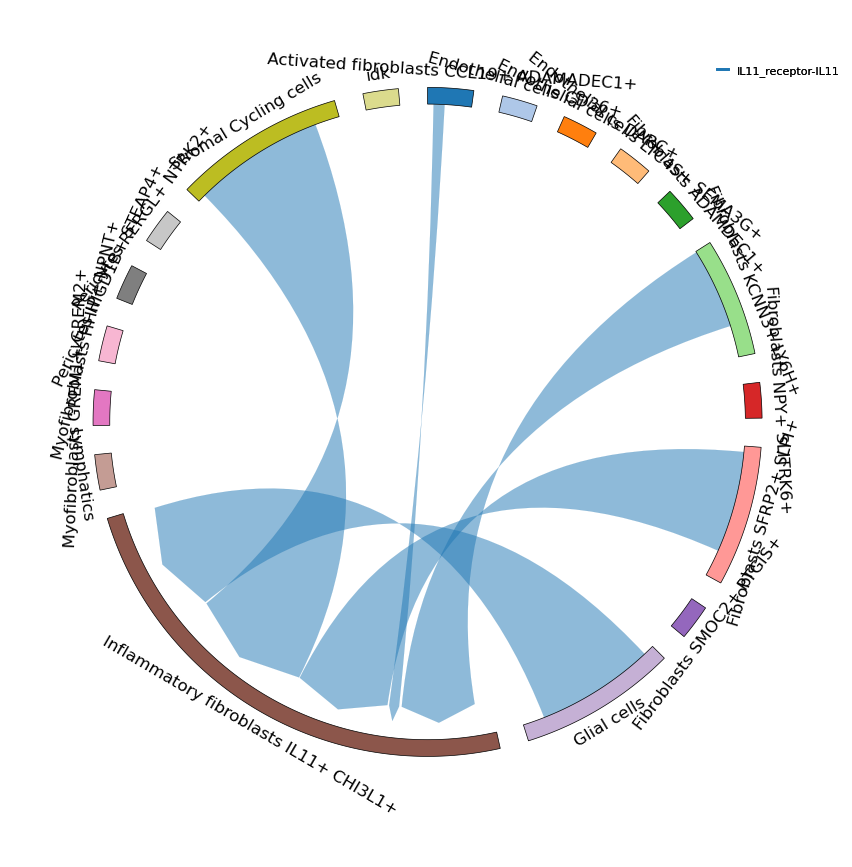

In [8]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1=".",
    cell_type2=".",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    celltype_key="celltype",
    interaction=["IL11"],
    link_kwargs={"direction": 1, "allow_twist": True, "r1": 95, "r2": 90},
    sector_text_kwargs={"color": "black", "size": 12, "r": 105, "adjust_rotation": True},
    legend_kwargs={"loc": "center", "bbox_to_anchor": (1, 1), "fontsize": 8},
    link_offset=1,
)

In [10]:
IL_genes = pd.read_csv('group-601.csv')

In [11]:
IL_genes = np.array(IL_genes['Approved symbol'])

In [35]:
IL_genes

array(['IL1A', 'IL1B', 'IL1F10', 'IL1RN', 'IL2', 'IL3', 'IL4', 'IL5',
       'IL6', 'IL7', 'CXCL8', 'IL9', 'IL10', 'IL11', 'IL12A', 'IL12B',
       'IL13', 'IL15', 'IL16', 'IL17A', 'IL17B', 'IL17C', 'IL17D',
       'IL17F', 'IL18', 'IL19', 'IL20', 'IL21', 'IL22', 'IL23A', 'IL24',
       'IL25', 'IL26', 'IL27', 'IL31', 'IL32', 'IL33', 'IL34', 'IL36A',
       'IL36B', 'IL36G', 'IL36RN', 'IL37'], dtype=object)

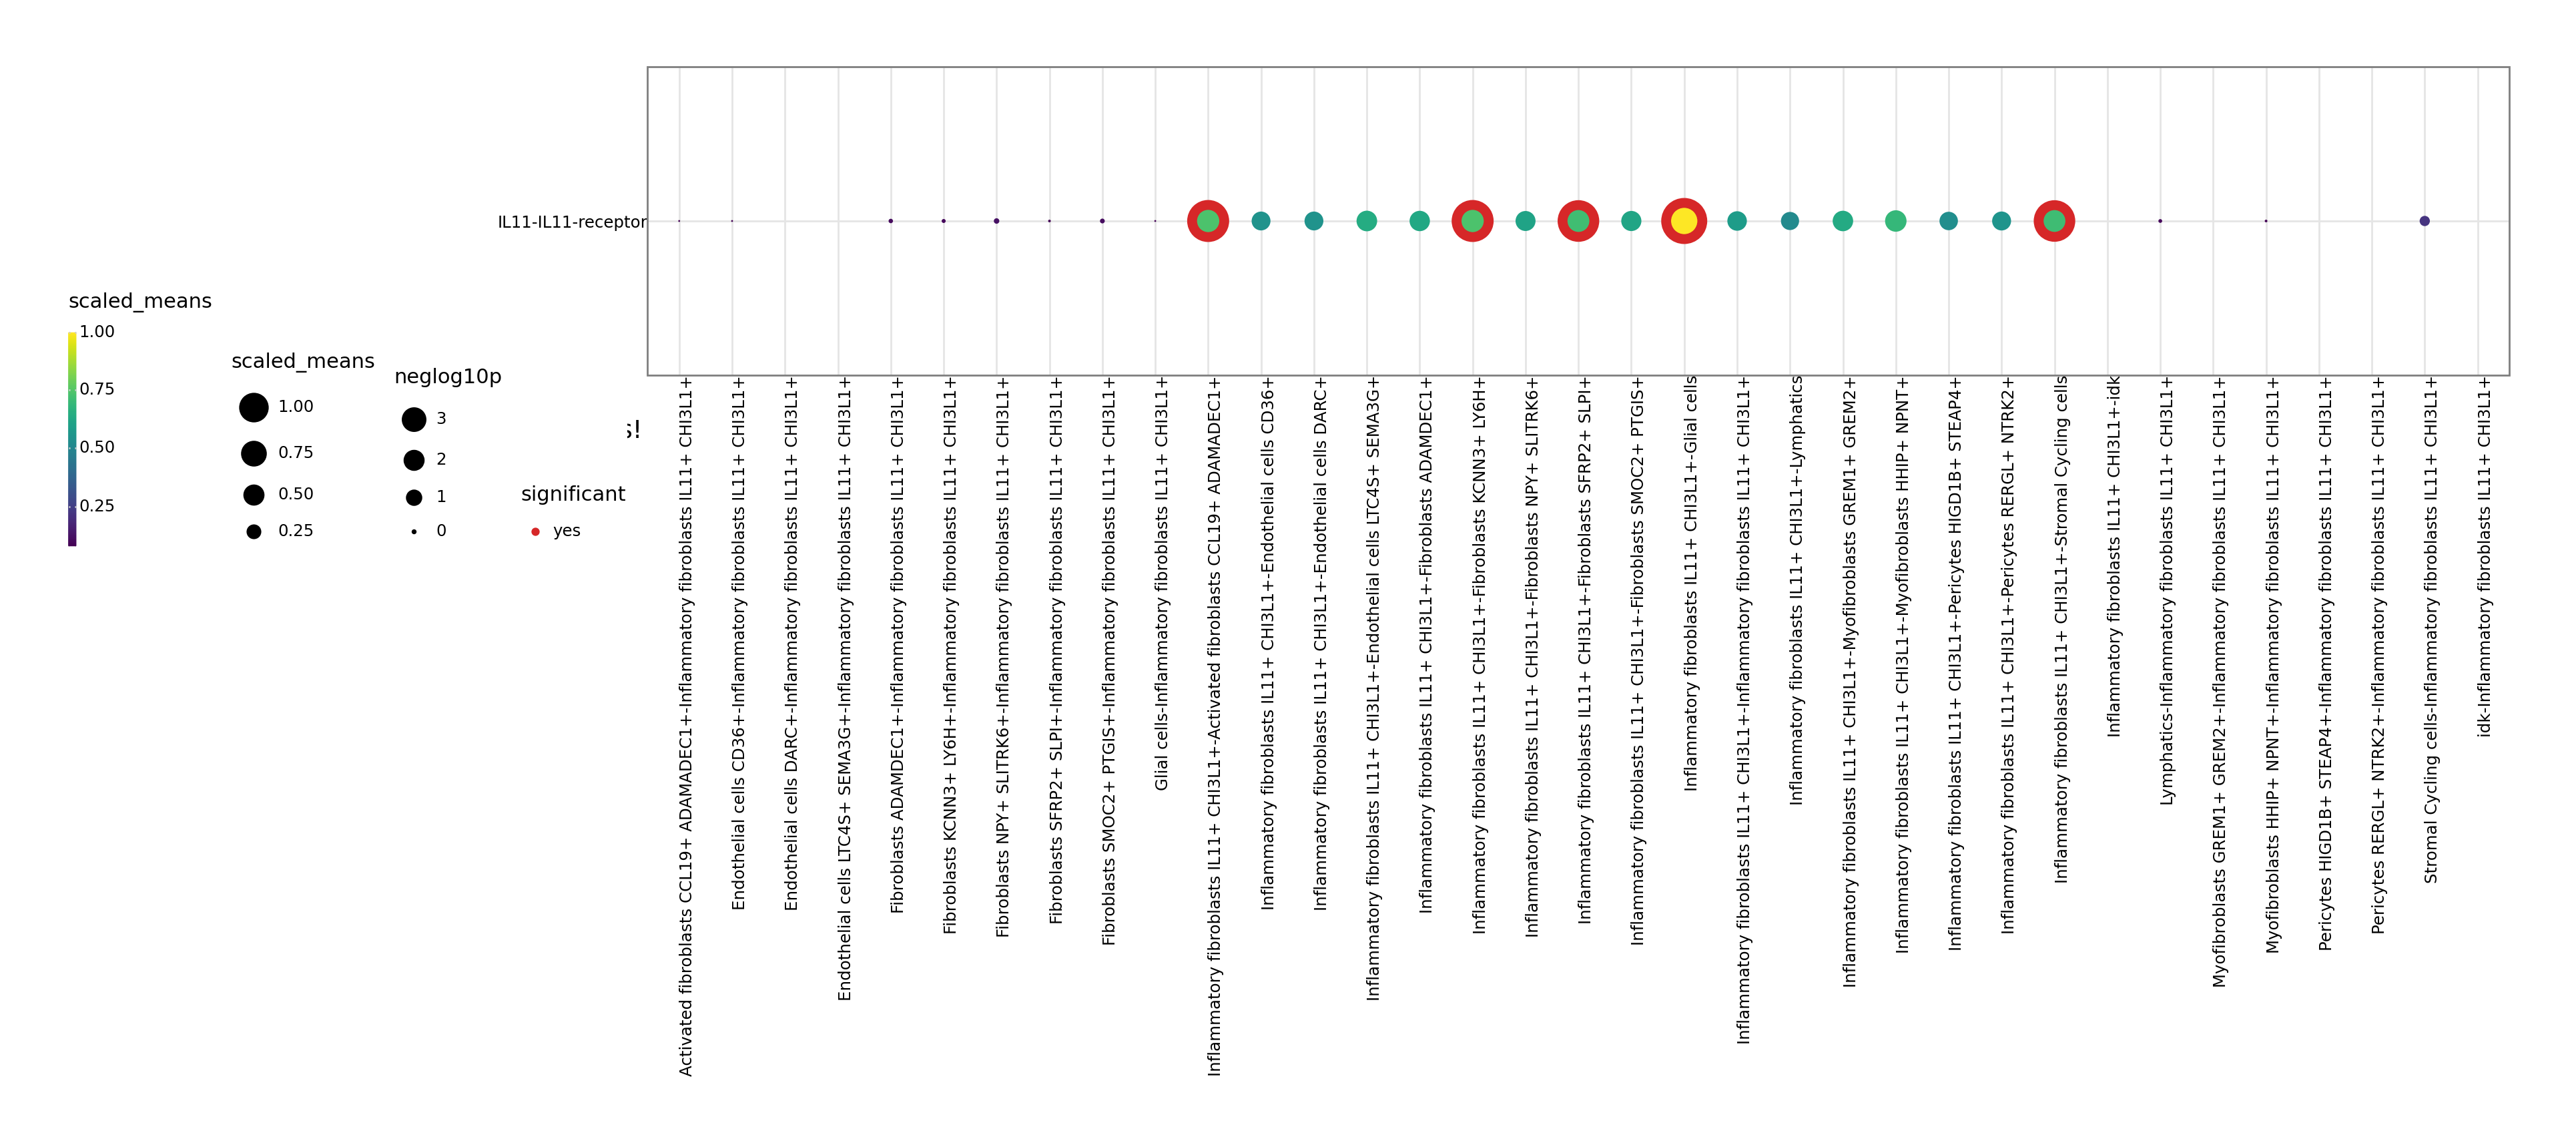

In [14]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="Inflammatory fibroblasts IL11+ CHI3L1+",
    cell_type2=".",  # this means all cell-types
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    genes=IL_genes,
    figsize=(18, 3),
    title="interacting interactions!",
)

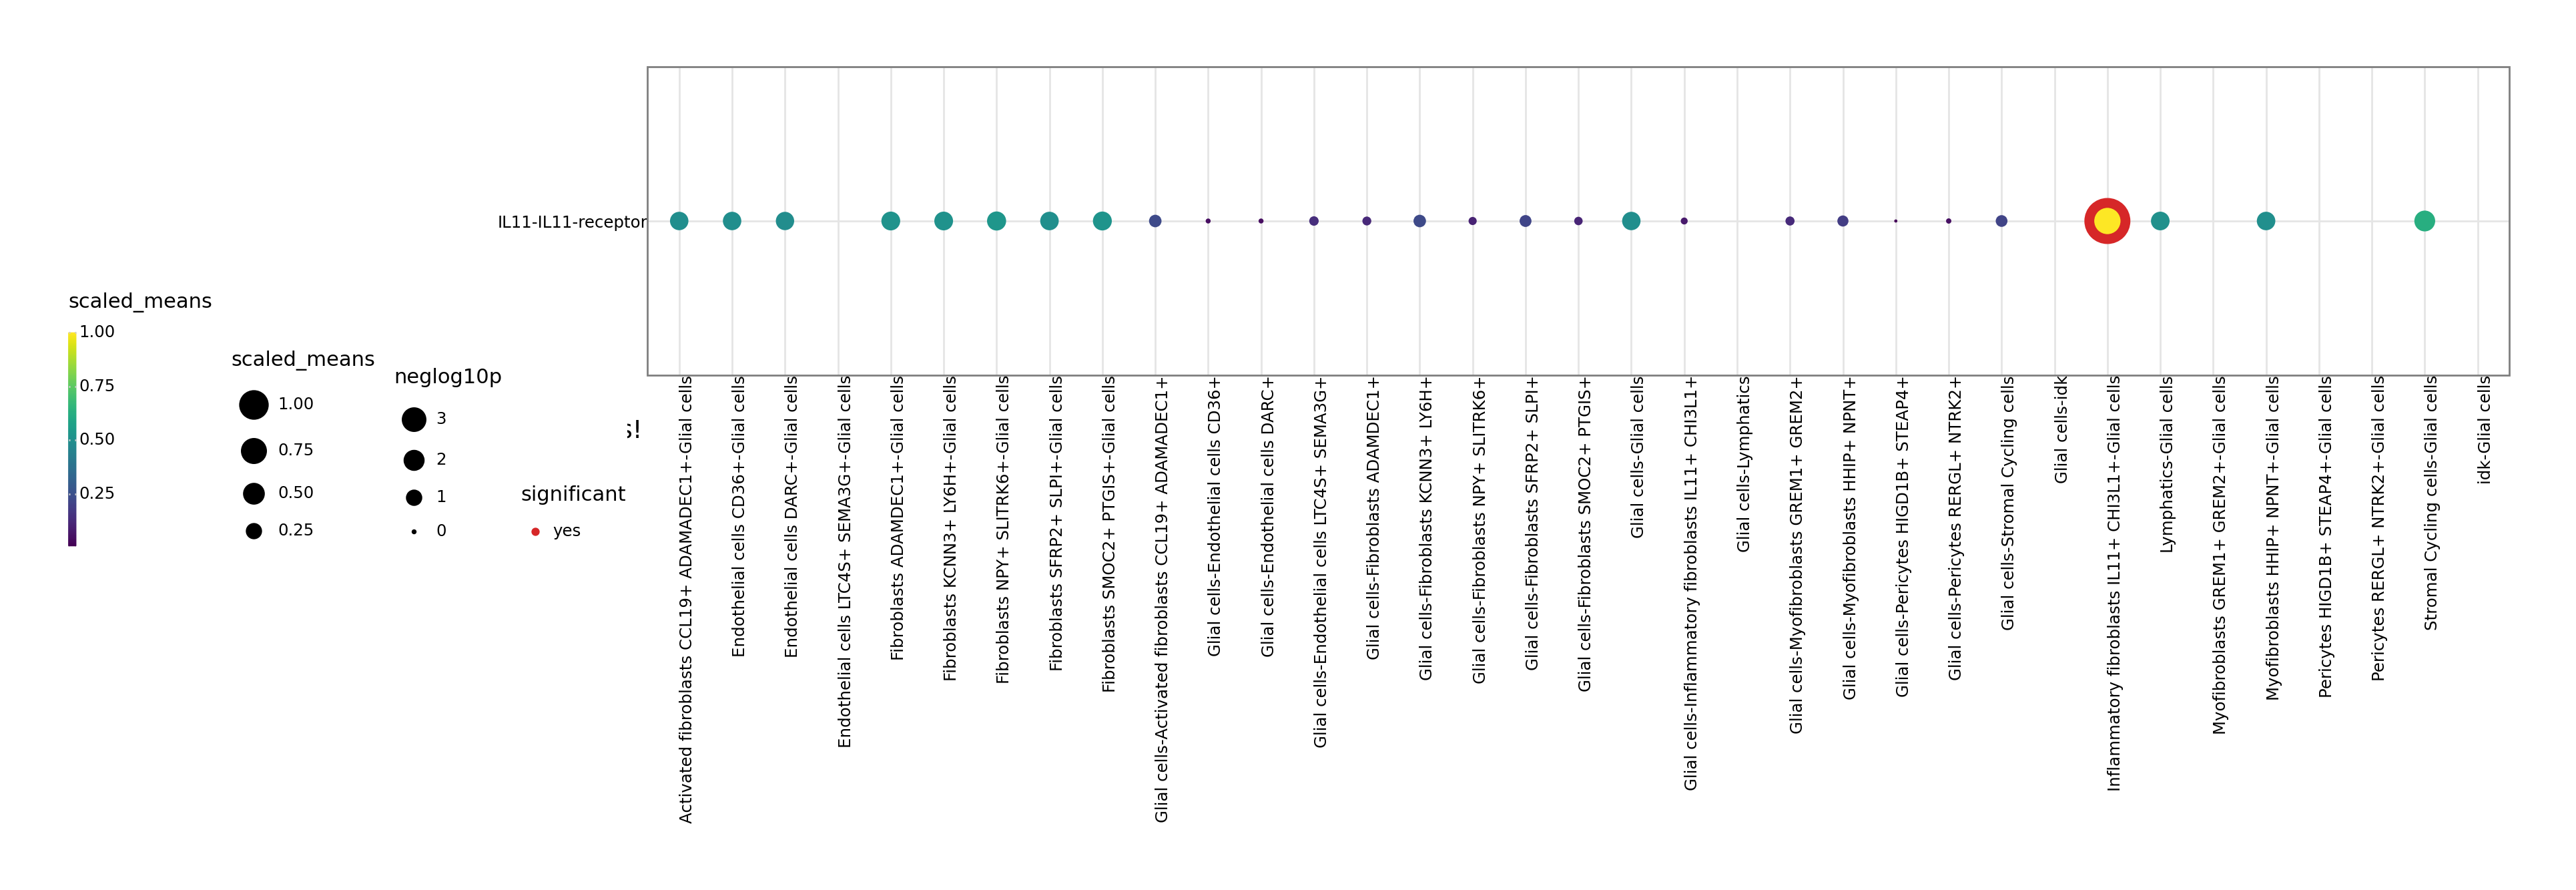

In [15]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="Glial cells",
    cell_type2=".",  # this means all cell-types
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    genes=IL_genes,
    figsize=(18, 3),
    title="interacting interactions!",
)